In [27]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv("clean_email_dataset.csv", encoding="utf-8")

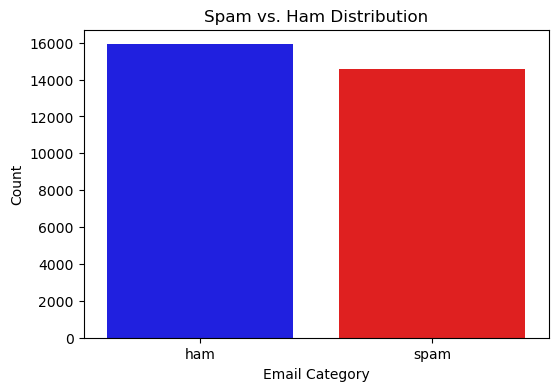

In [5]:
# STEP 1 -> CHECK CLASS DISTRIBUTION (SPAM / HAM)
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], palette=['blue', 'red'])
plt.title("Spam vs. Ham Distribution")
plt.xlabel("Email Category")
plt.ylabel("Count")
plt.show()

In [7]:
# STEP 2 -> COUNT MOST FREQUENT WORDS IN EACH CATEGORY
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# text -> tokenized words
df['tokens'] = df['text'].apply(word_tokenize)

# get most common words
spam_words = Counter([word for words in df[df['label'] == "spam"]["tokens"] for word in words])
ham_words = Counter([word for words in df[df['label'] == "ham"]["tokens"] for word in words])

# print most common words
print("Most Common Spam Words:", spam_words.most_common(10))
print("Most Common Ham Words:", ham_words.most_common(10))

Most Common Spam Words: [('subject', 16289), ('company', 11831), ('com', 9861), ('e', 8215), ('u', 7925), ('http', 7505), ('email', 7211), ('get', 6559), ('information', 6542), ('please', 6514)]
Most Common Ham Words: [('enron', 53915), ('ect', 34722), ('subject', 27735), ('hou', 16659), ('please', 12676), ('com', 12031), ('company', 11937), ('would', 11705), ('say', 11278), ('pm', 9169)]


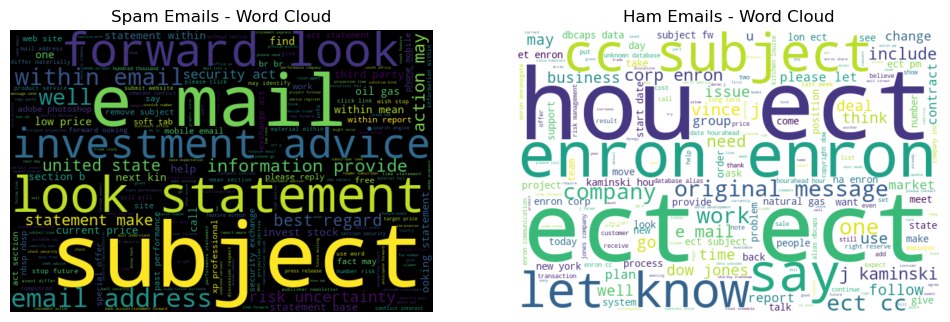

In [11]:
# STEP 3 -> VISUALIZE WORD FREQUENCIES
# install wordcloud library
!pip install wordcloud

from wordcloud import WordCloud

# Spam word cloud
spam_wc = WordCloud(width=600, height=400, background_color="black").generate(" ".join(df[df["label"] == "spam"]["text"]))

# Ham word cloud
ham_wc = WordCloud(width=600, height=400, background_color="white").generate(" ".join(df[df["label"] == "ham"]["text"]))

# plot word clouds
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.imshow(spam_wc, interpolation="bilinear")
plt.title("Spam Emails - Word Cloud")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(ham_wc, interpolation="bilinear")
plt.title("Ham Emails - Word Cloud")
plt.axis("off")

plt.show()

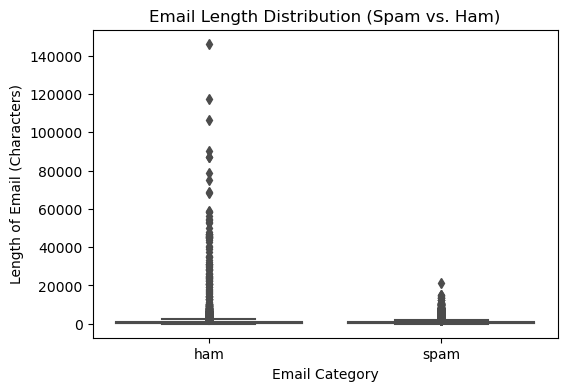

In [9]:
df["text_length"] = df["text"].apply(len)

plt.figure(figsize=(6,4))
sns.boxplot(x=df['label'], y=df['text_length'], palette=['blue', 'red'])
plt.title("Email Length Distribution (Spam vs. Ham)")
plt.xlabel("Email Category")
plt.ylabel("Length of Email (Characters)")
plt.show()

In [11]:
# STEP 4 -> find common bigrams in Spam (common word pairs)
from nltk.util import bigrams

# Get bigrams from spam emails
spam_bigrams = Counter([bg for words in df[df["label"] == "spam"]["tokens"] for bg in bigrams(words)])

print("Most Common Spam Bigrams:", spam_bigrams.most_common(10))

Most Common Spam Bigrams: [(('http', 'www'), 3146), (('e', 'mail'), 2481), (('look', 'statement'), 1924), (('forward', 'look'), 1680), (('investment', 'advice'), 1282), (('email', 'address'), 1262), (('within', 'email'), 989), (('information', 'provide'), 913), (('would', 'like'), 885), (('computron', 'com'), 842)]


In [1]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    ngram_range=(1,2),    # Unigrams + Bigrams  
    max_features=10000,   # Limit vocabulary  
    max_df=0.95,          # Remove words in >95% of docs  
    min_df=5,             # Remove words in <5 docs  
    stop_words='english', # Remove common words  
    sublinear_tf=True     # Normalize word frequency  
)

# Convert text to numerical features
X = tfidf.fit_transform(df['text'])

# STEP 5 -> WORD CORRELATIONS HEATMAP (TF-IDF FEATURES)
# Convert TF-IDF into a DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

# Compute correlation matrix
corr_matrix = tfidf_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("TF-IDF Feature Correlation")
plt.show()

NameError: name 'TfidfVectorizer' is not defined